In [93]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import shuffle

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [94]:
df = pd.read_csv('gold-dataset-sinha-khandait.csv')
print(df.shape)
df.head()

(10570, 10)


,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,PriceSentiment
0,28/1/16,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",0,0,1,0,1,0,negative
1,13/9/17,http://www.marketwatch.com/story/gold-prices-s...,gold suffers third straight daily decline,0,0,1,0,1,0,negative
2,26/7/16,http://www.marketwatch.com/story/gold-futures-...,Gold futures edge up after two-session decline,1,0,0,0,1,0,positive
3,28/2/18,https://www.metalsdaily.com/link/277199/dent-r...,dent research : is gold's day in the sun comin...,0,0,0,0,0,1,none
4,6/9/17,http://www.marketwatch.com/story/gold-steadies...,"Gold snaps three-day rally as Trump, lawmakers...",0,0,1,0,1,0,negative


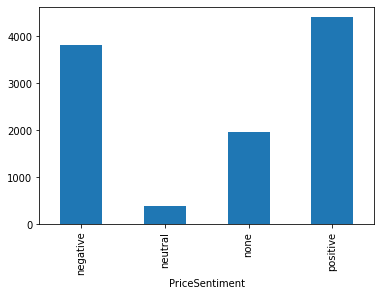

0.4288552507095553


In [95]:
df.groupby(df['PriceSentiment']).News.count().plot.bar(ylim=0)
plt.show()
print(4533/10570) #Baseline accuracy

#Porter Stemmer

In [96]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/whatbest/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [97]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

stemmer = PorterStemmer()
words = stopwords.words("english")

df['processedtext'] = df['News'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

In [98]:
print(df.shape)
df.head(10)

(10570, 11)


,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,PriceSentiment,processedtext
0,28/1/16,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",0,0,1,0,1,0,negative,april gold cent settl oz
1,13/9/17,http://www.marketwatch.com/story/gold-prices-s...,gold suffers third straight daily decline,0,0,1,0,1,0,negative,gold suffer third straight daili declin
2,26/7/16,http://www.marketwatch.com/story/gold-futures-...,Gold futures edge up after two-session decline,1,0,0,0,1,0,positive,gold futur edg two session declin
3,28/2/18,https://www.metalsdaily.com/link/277199/dent-r...,dent research : is gold's day in the sun comin...,0,0,0,0,0,1,none,dent research gold day sun come soon
4,6/9/17,http://www.marketwatch.com/story/gold-steadies...,"Gold snaps three-day rally as Trump, lawmakers...",0,0,1,0,1,0,negative,gold snap three day ralli trump lawmak reach d...
5,16/8/16,http://www.marketwatch.com/story/dec-gold-clim...,"Dec. gold climbs $9.40, or 0.7%, to settle at ...",1,0,0,0,1,0,positive,dec gold climb settl oz
6,24/9/13,https://economictimes.indiatimes.com/markets/c...,"gold falls by rs 25 on sluggish demand, global...",0,0,1,0,1,0,negative,gold fall rs sluggish demand global cue
7,23/9/16,http://www.marketwatch.com/story/gold-futures-...,"Gold futures fall for the session, but gain fo...",1,0,1,0,1,0,positive,gold futur fall session gain week
8,21/10/12,https://www.thehindubusinessline.com/opinion/c...,"Gold struggles; silver slides, base metals falter",0,1,0,1,1,0,neutral,gold struggl silver slide base metal falter
9,16/3/18,http://www.marketwatch.com/story/april-gold-ho...,"april gold holds slight gain, up $2.50, or 0.2...",1,0,0,0,1,0,positive,april gold hold slight gain oz


In [99]:
from sklearn.model_selection import train_test_split

target = df['PriceSentiment']

X_train, X_test, y_train, y_test = train_test_split(df['processedtext'], target, test_size=0.30, random_state=100)

print(df.shape); print(X_train.shape); print(X_test.shape)

(10570, 11)
(7399,)
(3171,)


In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)

train_tfIdf = vectorizer_tfidf.fit_transform(X_train.values.astype('U'))

test_tfIdf = vectorizer_tfidf.transform(X_test.values.astype('U'))

print(vectorizer_tfidf.get_feature_names()[:10])

['aayog', 'abat', 'abbrevi', 'abc', 'abn', 'acacia', 'acceler', 'access', 'account', 'accredit']


In [101]:
print(train_tfIdf.shape); print(test_tfIdf.shape)

(7399, 2698)
(3171, 2698)


#การประเมิน Naïve Bayes Model

In [102]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

nb_classifier = MultinomialNB()

nb_classifier.fit(train_tfIdf, y_train)

pred2 = nb_classifier.predict(test_tfIdf) 
print(pred2[:10])

['positive' 'negative' 'positive' 'positive' 'negative' 'none' 'none'
 'positive' 'negative' 'neutral']


In [103]:
# Calculate the accuracy score: score
accuracy_tfidf = metrics.accuracy_score(y_test, pred2)
print(accuracy_tfidf)

Conf_metrics_tfidf = metrics.confusion_matrix(y_test, pred2, labels=['positive', 'negative', 'none', 'neutral'])
print(Conf_metrics_tfidf)

0.7303689687795648
[[1142  151   29    0]
 [ 297  785   37    0]
 [ 172   64  377    0]
 [  62   40    3   12]]


การสร้างตัวแยกประเภทป่าสุ่ม

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 100)

classifier.fit(train_tfIdf, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=100)

In [105]:
predRF = classifier.predict(test_tfIdf) 
print(predRF[:10])

# Calculate the accuracy score
accuracy_RF = metrics.accuracy_score(y_test, predRF)
print(accuracy_RF)

Conf_metrics_RF = metrics.confusion_matrix(y_test, predRF, labels=['positive', 'negative', 'none', 'neutral'])
print(Conf_metrics_RF)

['positive' 'negative' 'positive' 'positive' 'negative' 'none' 'none'
 'negative' 'positive' 'neutral']
0.7723115736360769
[[1042  206   66    8]
 [ 173  891   50    5]
 [  95   58  456    4]
 [  23   29    5   60]]
